<a href="https://colab.research.google.com/github/asmahassouna/Machine-Learning/blob/main/isolation_davies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

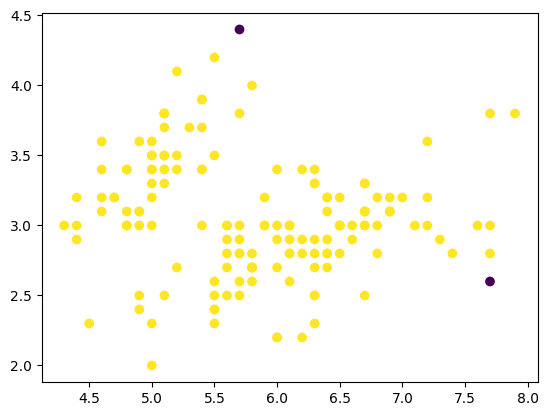

In [40]:
#ISOLER LES ABERRANTES

from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #load_diabeties
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from scipy. cluster.hierarchy import dendrogram, linkage
import numpy as np


#load wine data set
iris = load_iris()
X=iris.data

#print(iris.target) #0, 1 ou 2 -> les labels

model = IsolationForest(contamination=0.01,n_estimators=100) #on veut filter 1% de donnée
model.fit(X)

# y_pred : 1/-1 => predire l'outlier data => 1 : inlier, -1 : outlier
y_pred=model.predict(X)

#predire l'outlier data,
#l'anomalie,si elle est correctement prédite, appariatera d'une couleur différence des autres,

plt.scatter(X[:,0],X[:,1], c=y_pred)




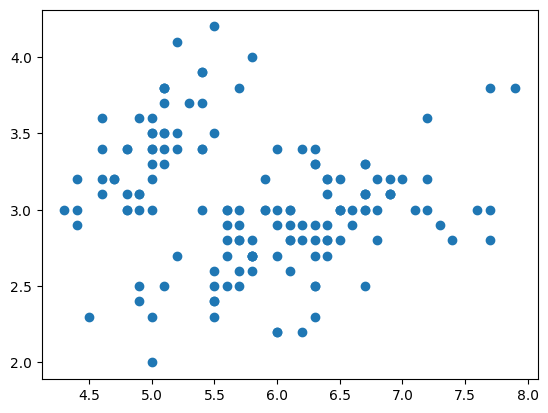

In [43]:

#eliminer les outliers : jointure
X_cleaned=X[np.where(y_pred==1, True, False)]
#X : 150 lignes, X_cleaned: 148  (2 lignes supprimé )

plt.scatter(X_cleaned[:,0],X_cleaned[:,1])


In [46]:
#CREER LES CLUSTERS

#Perform agglomerative Hierarcical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score


agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X_cleaned)

#Get the cluster labels
labels=agg_clustering.labels_
print("Computed Labels (clustering):", labels) #les labels predicted 0, 1 ou 2 (3 classes)

#compute Davies_Bouldin_Score
db_index=davies_bouldin_score(X_cleaned, labels)

print(f"Davies-Bouldin Index:{db_index}")



Computed Labels (clustering): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 2
 2 0 0 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 0]
Computed Labels (clustering): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 2
 2 0 0 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 0]
Davies-Bouldin Index:0.6545739981428795


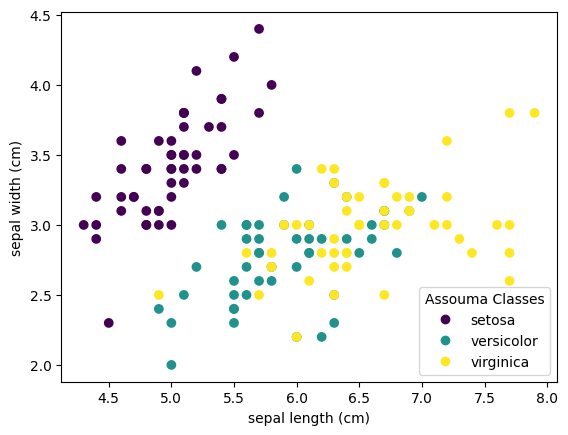

In [21]:
#23/03: afficher iris data set
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #load_diabeties
import numpy as np


#load iris data set
iris = load_iris()
X=iris.data

#plot data sets
scatter = plt.scatter(X[:,0], X[:,1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

#colonne 0 = feature1 => sepal length
#colonne 1 = feature2 => sepal width
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Assouma Classes")
